In [1]:
!pip install -q scikit-learn xgboost imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Loading the Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

Saving fertility.csv to fertility.csv


In [3]:
# Exploring and cleaning the extra spaces from the data
df.columns = [col.strip() for col in df.columns]
print(df.head())

   Season  Age Childish diseases Accident or serious trauma  \
0  spring   30                no                        yes   
1  spring   35               yes                         no   
2  spring   27               yes                         no   
3  spring   32                no                        yes   
4  spring   30               yes                        yes   

  Surgical intervention High fevers in the last year  \
0                   yes       more than 3 months ago   
1                   yes       more than 3 months ago   
2                    no       more than 3 months ago   
3                   yes       more than 3 months ago   
4                    no       more than 3 months ago   

  Frequency of alcohol consumption Smoking habit  \
0                      once a week    occasional   
1                      once a week         daily   
2             hardly ever or never         never   
3             hardly ever or never         never   
4                      o

In [12]:
# Encoding Categorical Features

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'Diagnosis' in categorical_cols:
    categorical_cols.remove('Diagnosis')

# One-hot encoding all categorical features
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Encoding target if still categorical
if df['Diagnosis'].dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

numerical_cols = ['Age', 'Number of hours spent sitting per day']
X = pd.concat([df_encoded, df[numerical_cols]], axis=1)
y = df['Diagnosis']

In [13]:
# Making train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handling Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

#  Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.94      0.94      0.94        18

    accuracy                           0.90        20
   macro avg       0.72      0.72      0.72        20
weighted avg       0.90      0.90      0.90        20

Confusion Matrix:
 [[ 1  1]
 [ 1 17]]
Cross-Validation Accuracy: 0.86


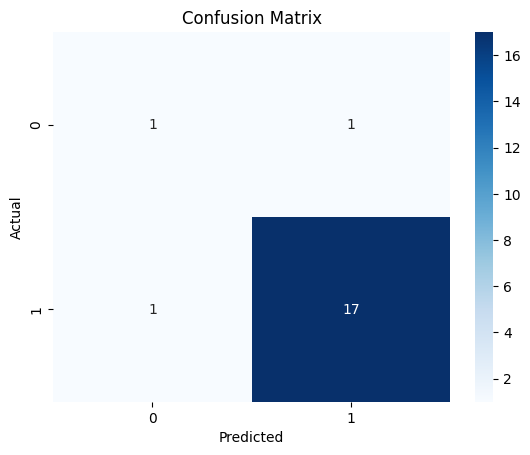

In [14]:
# Evaluating the Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))

# Visualization through Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()